# Predicting Readmission Rates For Patient Hospitalizations

## Import data and process data 

In [1]:
import IPython
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
from statistics import mode
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
## Data Preview
# Read the dataset into the dataframe 
data = pd.read_csv("C:/Users/gaura/OneDrive - IIT Kanpur/Desktop/Projects/Predicting Readmission Rates For Patient Hospitalizations/Hospital_readmission_prediction/diabetic_data.csv")

# Check the size of the dataset 
data.shape

(101766, 50)

In [8]:
# Check the overall information:data typle and null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [9]:
# recheck the object data type 
for i in data.columns:
    if data[i].dtype==object:
        d= data[i].value_counts()
        print(pd.DataFrame(data=d))
"""There are no null values in the dataset"""

                 count
race                  
Caucasian        76099
AfricanAmerican  19210
?                 2273
Hispanic          2037
Other             1506
Asian              641
                 count
gender                
Female           54708
Male             47055
Unknown/Invalid      3
          count
age            
[70-80)   26068
[60-70)   22483
[50-60)   17256
[80-90)   17197
[40-50)    9685
[30-40)    3775
[90-100)   2793
[20-30)    1657
[10-20)     691
[0-10)      161
           count
weight          
?          98569
[75-100)    1336
[50-75)      897
[100-125)    625
[125-150)    145
[25-50)       97
[0-25)        48
[150-175)     35
[175-200)     11
>200           3
            count
payer_code       
?           40256
MC          32439
HM           6274
SP           5007
BC           4655
MD           3532
CP           2533
UN           2448
CM           1937
OG           1033
PO            592
DM            549
CH            146
WC            135
OT             95

'There are no null values in the dataset'

In [10]:
# Check the numerical data values 
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
encounter_id,101766.0,1.652016e+08,1.026403e+08,12522.0,84961194.0,152388987.0,2.302709e+08,443867222.0
patient_nbr,101766.0,5.433040e+07,3.869636e+07,135.0,23413221.0,45505143.0,8.754595e+07,189502619.0
admission_type_id,101766.0,2.024006e+00,1.445403e+00,1.0,1.0,1.0,3.000000e+00,8.0
discharge_disposition_id,101766.0,3.715642e+00,5.280166e+00,1.0,1.0,1.0,4.000000e+00,28.0
admission_source_id,101766.0,5.754437e+00,4.064081e+00,1.0,1.0,7.0,7.000000e+00,25.0
time_in_hospital,101766.0,4.395987e+00,2.985108e+00,1.0,2.0,4.0,6.000000e+00,14.0
num_lab_procedures,101766.0,4.309564e+01,1.967436e+01,1.0,31.0,44.0,5.700000e+01,132.0
num_procedures,101766.0,1.339730e+00,1.705807e+00,0.0,0.0,1.0,2.000000e+00,6.0
num_medications,101766.0,1.602184e+01,8.127566e+00,1.0,10.0,15.0,2.000000e+01,81.0
number_outpatient,101766.0,3.693572e-01,1.267265e+00,0.0,0.0,0.0,0.000000e+00,42.0


## Attribute Plotting 

### Readmission Rate Count 

<Axes: title={'center': 'Readmission_count'}, xlabel='readmitted'>

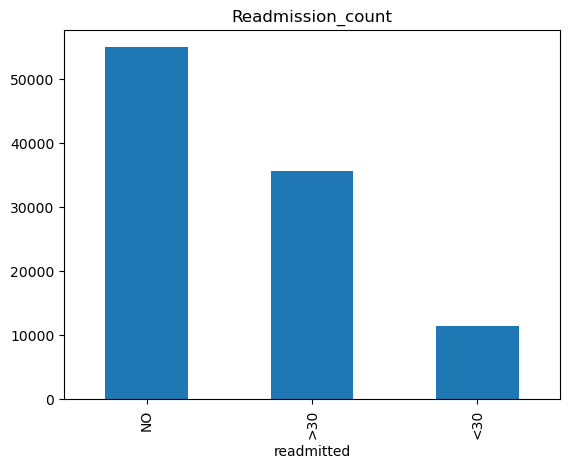

In [11]:
target_count=data['readmitted'].value_counts()
target_count.plot(kind='bar', title='Readmission_count')

### Age and Gender Count

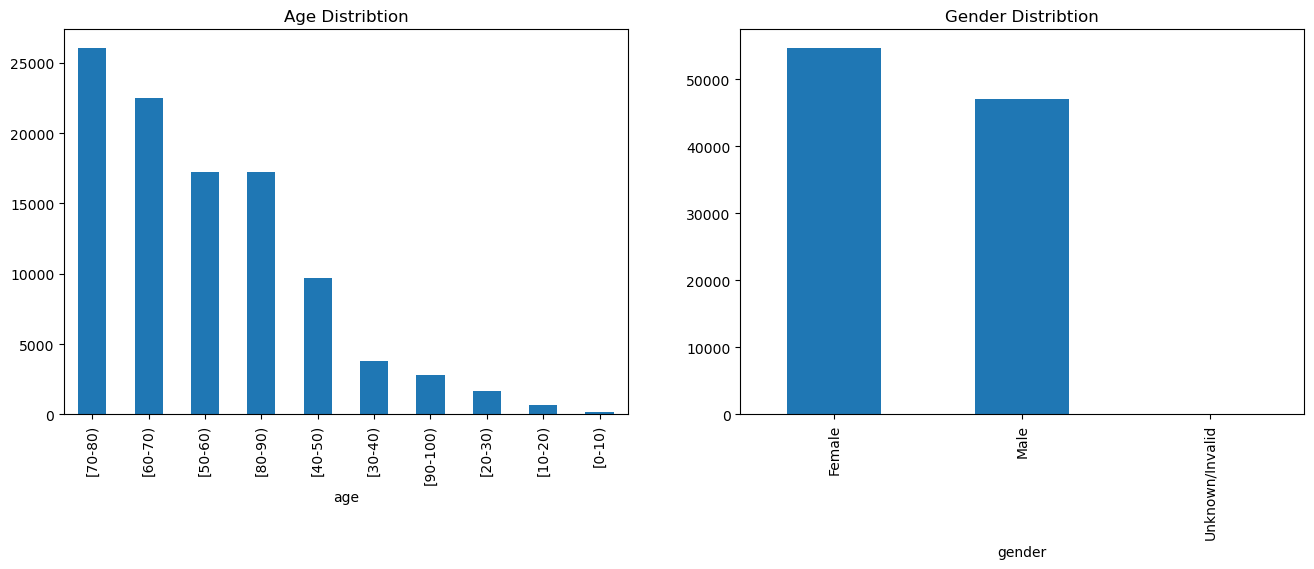

In [12]:
age_count=data["age"].value_counts()
gender_count=data["gender"].value_counts()# Have to deal with unkown/invalid count 
fig,(ax1, ax2)= plt.subplots(1,2,figsize=(16,5))
_ = age_count.plot(kind='bar',title='Age Distribtion',ax=ax1)
_ = gender_count.plot(kind='bar',title='Gender Distribtion',ax=ax2)

### Race and Weight Count 

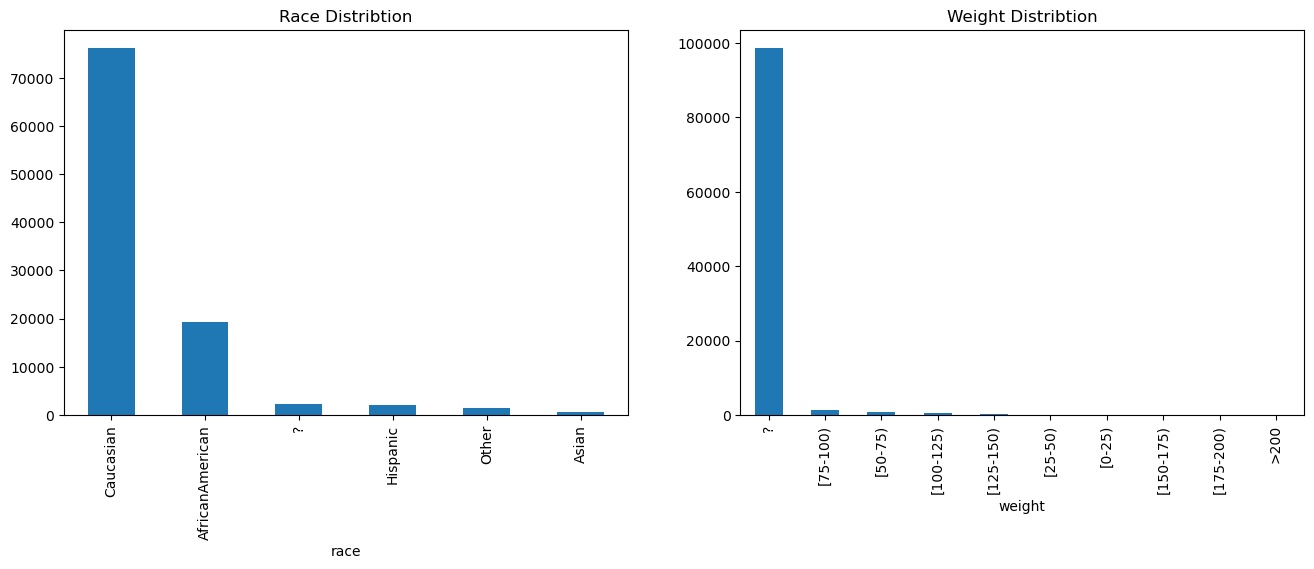

In [13]:
race_count=data["race"].value_counts()
weight_count=data["weight"].value_counts()# Have to deal with unkown/invalid count 
fig,(ax1, ax2)= plt.subplots(1,2,figsize=(16,5))
_ = race_count.plot(kind='bar',title='Race Distribtion',ax=ax1)# Missing values
_ = weight_count.plot(kind='bar',title='Weight Distribtion',ax=ax2)# Missing values 

### Numerical data Distribution 

In [ ]:
num_col = list(set(list(data._get_numeric_data().columns))- {'readmitted'})
sns.set()
sns.pairplot(data[num_col], size = 2.5)
plt.show();

C:\Users\gaura\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


# Data Processing

In [ ]:
# Make a copy of the file for pre-processing 
train = data.copy(deep=True)

## Processing object-type missing values

In [ ]:
df = []
# Checkthe percentage of the missing values 
for col in train.columns:
    if train[col].dtype == object:
        count_missing = train[col][train[col] == '?'].count()
        percent_missing = (count_missing.sum()/train.shape[0]*100).round(2)
#         print(col,count_missing,percent_missing)
        df.append([col,count_missing,percent_missing])
missing_value=pd.DataFrame(df,columns=["col","count_missing","percent_missing"]).sort_values(by="percent_missing",ascending=False)
missing_value

### Drop high missing values 

In [ ]:
# drop the irrelavant and high missing value variables
# drop weight because of its high missing value 97% 
# drop medical_specialty because of its high missing value 49.8%
train=train.drop(['weight','medical_specialty'],axis=1)
# drop payer_code because it is irrelevant to our studies 
train=train.drop(['payer_code'],axis=1)
# Drop only the missing values in all three diagonosis categories 
train = train.drop(set(train[(train['diag_1']== '?') & (train['diag_2'] == '?') & (train['diag_3'] == '?')].index))
# Drop the patients who is expired after discharge which is out of our interest population
train = train.drop(set(train[train['discharge_disposition_id']==11].index))

In [ ]:
train.shape

### Drop missing values in 'Gender' and 'Race'

In [ ]:
# Process the missing values in gender
print('gender', train['gender'][train['gender'] == 'Unknown/Invalid'].count()) #only 3 missing values 
train = train.drop(set(train['gender'][train['gender'] == 'Unknown/Invalid'].index))
# Process the missing values in race
train= train.drop(set(train['race'][train['race']=='?'].index)) # drop the 2273 missing values 

In [ ]:
train.shape

### Drop irrelevant variables

In [ ]:
# Drop irrelevant variables and high percent missing varaibles 
train=train.drop(["encounter_id","patient_nbr"],axis=1)

In [ ]:
# Drop two attributes citoglipton and examide that have the all same value
train=train.drop(["citoglipton","examide"],axis = 1)

## Creating/recoding new features

In [ ]:
train.shape

### Create new feature: patient_service 

In [ ]:
# Create a new feature service_utilization
train['patient_service'] = train['number_outpatient'] + train['number_emergency'] + train['number_inpatient']

### Create new feature: med_change

In [ ]:
# Create a new variable to calculate the change of medication dose
keys = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 
        'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 
        'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone', 
        'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']

In [ ]:
for col in keys:
    col_name = str(col) + 'new' #change the column name 
    train[col_name] = train[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)# recode the med use into binary variable
train['med_change'] = 0
for col in keys:
    col_name = str(col) + 'new'
    train['med_change'] = train['med_change'] + train[col_name]
    del train[col_name]

In [ ]:
# Check the status of the new feature med_change
train['med_change'].value_counts()

### Create new feature: num_med

In [ ]:
# calculate the number of medications used for each patient 
for col in keys:
    train[col] = train[col].replace('No', 0)
    train[col] = train[col].replace('Steady', 1)
    train[col] = train[col].replace('Up', 1)
    train[col] = train[col].replace('Down', 1) 
train['num_med'] = 0
for col in keys:
    train['num_med'] = train['num_med'] + train[col]

In [ ]:
train['num_med'].value_counts()

### Recode diagnosis into new categories 

In [ ]:
"""diag_1=primary diagnosis; diag_2=secondary diagnosis; diag_3=additional diagnosis\
i"""
# duplicate a diagnosis column
train['primary_diag'] = train['diag_1']
train['secondary_diag'] = train['diag_2']
train['additional_diag'] = train['diag_3']

In [ ]:
# replace the unknown values "?" with -1
train['primary_diag'] = train['primary_diag'].replace('?', -1)
train['secondary_diag'] = train['secondary_diag'].replace('?', -1)
train['additional_diag'] = train['additional_diag'].replace('?', -1)

In [ ]:
# recode ICE code of V or E to “other” category = 0
train.loc[train['diag_1'].str.contains('V'), ['primary_diag']] = 0
train.loc[train['diag_1'].str.contains('E'), ['primary_diag']] = 0
train.loc[train['diag_2'].str.contains('V'), ['secondary_diag']] = 0
train.loc[train['diag_2'].str.contains('E'), ['secondary_diag']] = 0
train.loc[train['diag_3'].str.contains('V'), ['additional_diag']] = 0
train.loc[train['diag_3'].str.contains('E'), ['additional_diag']] = 0

In [ ]:
# convert the data type to float to enable computations later
train['primary_diag'] = train['primary_diag'].astype(float)
train['secondary_diag'] = train['secondary_diag'].astype(float)
train['additional_diag'] = train['additional_diag'].astype(float)

In [ ]:
# recode ICD codes of diag1,diag2,diag3 between certain ranges to certain categories
for index, row in train.iterrows():
    if (row['primary_diag'] >= 390 and row['primary_diag'] < 460) or (np.floor(row['primary_diag']) == 785):
        train.loc[index, 'primary_diag'] = 1
    elif (row['primary_diag'] >= 460 and row['primary_diag'] < 520) or (np.floor(row['primary_diag']) == 786):
        train.loc[index, 'primary_diag'] = 2
    elif (row['primary_diag'] >= 520 and row['primary_diag'] < 580) or (np.floor(row['primary_diag']) == 787):
        train.loc[index, 'primary_diag'] = 3
    elif (np.floor(row['primary_diag']) == 250):
        train.loc[index, 'primary_diag'] = 4
    elif (row['primary_diag'] >= 800 and row['primary_diag'] < 1000):
        train.loc[index, 'primary_diag'] = 5
    elif (row['primary_diag'] >= 710 and row['primary_diag'] < 740):
        train.loc[index, 'primary_diag'] = 6
    elif (row['primary_diag'] >= 580 and row['primary_diag'] < 630) or (np.floor(row['primary_diag']) == 788):
        train.loc[index, 'primary_diag'] = 7
    elif (row['primary_diag'] >= 140 and row['primary_diag'] < 240):
        train.loc[index, 'primary_diag'] = 8
    else:
        train.loc[index, 'primary_diag'] = 0

In [ ]:
for index, row in train.iterrows():
    if (row['secondary_diag'] >= 390 and row['secondary_diag'] < 460) or (np.floor(row['secondary_diag']) == 785):
        train.loc[index, 'secondary_diag'] = 1
    elif (row['secondary_diag'] >= 460 and row['secondary_diag'] < 520) or (np.floor(row['secondary_diag']) == 786):
        train.loc[index, 'secondary_diag'] = 2
    elif (row['secondary_diag'] >= 520 and row['secondary_diag'] < 580) or (np.floor(row['secondary_diag']) == 787):
        train.loc[index, 'secondary_diag'] = 3
    elif (np.floor(row['secondary_diag']) == 250):
        train.loc[index, 'secondary_diag'] = 4
    elif (row['secondary_diag'] >= 800 and row['secondary_diag'] < 1000):
        train.loc[index, 'secondary_diag'] = 5
    elif (row['secondary_diag'] >= 710 and row['secondary_diag'] < 740):
        train.loc[index, 'secondary_diag'] = 6
    elif (row['secondary_diag'] >= 580 and row['secondary_diag'] < 630) or (np.floor(row['secondary_diag']) == 788):
        train.loc[index, 'secondary_diag'] = 7
    elif (row['secondary_diag'] >= 140 and row['secondary_diag'] < 240):
        train.loc[index, 'secondary_diag'] = 8
    else:
        train.loc[index, 'secondary_diag'] = 0

In [ ]:
for index, row in train.iterrows():
    if (row['additional_diag'] >= 390 and row['additional_diag'] < 460) or (np.floor(row['additional_diag']) == 785):
        train.loc[index, 'additional_diag'] = 1
    elif (row['additional_diag'] >= 460 and row['additional_diag'] < 520) or (np.floor(row['additional_diag']) == 786):
        train.loc[index, 'additional_diag'] = 2
    elif (row['additional_diag'] >= 520 and row['additional_diag'] < 580) or (np.floor(row['additional_diag']) == 787):
        train.loc[index, 'additional_diag'] = 3
    elif (np.floor(row['additional_diag']) == 250):
        train.loc[index, 'additional_diag'] = 4
    elif (row['additional_diag'] >= 800 and row['additional_diag'] < 1000):
        train.loc[index, 'additional_diag'] = 5
    elif (row['additional_diag'] >= 710 and row['additional_diag'] < 740):
        train.loc[index, 'additional_diag'] = 6
    elif (row['additional_diag'] >= 580 and row['additional_diag'] < 630) or (np.floor(row['additional_diag']) == 788):
        train.loc[index, 'additional_diag'] = 7
    elif (row['additional_diag'] >= 140 and row['additional_diag'] < 240):
        train.loc[index, 'additional_diag'] = 8
    else:
        train.loc[index, 'additional_diag'] = 0

In [ ]:
train[['diag_1','primary_diag']].head(15).T

In [ ]:
train[['diag_2','secondary_diag']].head(15).T

In [ ]:
train[['diag_3','additional_diag']].head(15).T

### Recode admission_type_id and discharge_disposition_id and admission_source_id

In [ ]:
train['admission_type_id'].value_counts()

In [ ]:
# recode admission type (1-Emergency 5-Referral)
train['admission_type_id'] = train['admission_type_id'].replace(2,1)
train['admission_type_id'] = train['admission_type_id'].replace(7,1)
train['admission_type_id'] = train['admission_type_id'].replace(6,5)
train['admission_type_id'] = train['admission_type_id'].replace(8,5)

In [ ]:
train['discharge_disposition_id'].sort_values(ascending=False,inplace=False).value_counts()

In [ ]:
# recode discharge_disposition_id type (1-discharged to home 2-other 3-? 4-?)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(6,1)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(8,1)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(9,1)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(13,1)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(3,2)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(4,2)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(5,2)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(14,2)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(22,2)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(23,2)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(24,2)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(12,10)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(15,10)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(16,10)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(17,10)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(25,18)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(26,18)

In [ ]:
train['admission_source_id'].sort_values(ascending=False,inplace=False).value_counts()

In [ ]:
# recode ad_mission_source_id type (1-emergency 4-home 9-transfer 11-other) 
train['admission_source_id'] = train['admission_source_id'].replace(2,1)
train['admission_source_id'] = train['admission_source_id'].replace(3,1)
train['admission_source_id'] = train['admission_source_id'].replace(5,4)
train['admission_source_id'] = train['admission_source_id'].replace(6,4)
train['admission_source_id'] = train['admission_source_id'].replace(10,4)
train['admission_source_id'] = train['admission_source_id'].replace(22,4)
train['admission_source_id'] = train['admission_source_id'].replace(25,4)
train['admission_source_id'] = train['admission_source_id'].replace(7,9)
train['admission_source_id'] = train['admission_source_id'].replace(17,9)
train['admission_source_id'] = train['admission_source_id'].replace(20,9)
train['admission_source_id'] = train['admission_source_id'].replace(21,9)
train['admission_source_id'] = train['admission_source_id'].replace(13,11)
train['admission_source_id'] = train['admission_source_id'].replace(14,11)

### Create dummy Variables-change, gender and diabetesMed

In [ ]:
# Recode change 
train['change'] = train['change'].replace('Ch', 1)
train['change'] = train['change'].replace('No', 0)
# Recode gender 
train['gender'] = train['gender'].replace('Male', 1)
train['gender'] = train['gender'].replace('Female', 0)
# Recode diabetesMed
train['diabetesMed'] = train['diabetesMed'].replace('Yes', 1)
train['diabetesMed'] = train['diabetesMed'].replace('No', 0)

### Recode the outcome variable-Readmitted

In [ ]:
"""Since our interest here is the readmission rate that is less than 30 days??"""
# calculate the outcome variable readmission
train['readmitted'] = train['readmitted'].replace('>30', 0)
train['readmitted'] = train['readmitted'].replace('<30', 1)
train['readmitted'] = train['readmitted'].replace('NO', 0)

### Recode the ordinal variable-Age

In [ ]:
train['age'].sort_values(ascending=False).value_counts()

In [ ]:
#recode age using mean of each order 
"""recode it by means is the trade-off of uisng the continuous 1-10. Using the mean can maintain the interpretability of the age"""
age_dict = {'[0-10)':5, '[10-20)':15, '[20-30)':25, '[30-40)':35, '[40-50)':45, '[50-60)':55, '[60-70)':65, '[70-80)':75, '[80-90)':85, '[90-100)':95}
train['age'] = train.age.map(age_dict)
train['age'] = train['age'].astype('int64')

### Recode the categorical variables: Race, A1Cresult,max_glu_serum

In [ ]:
train['race'].sort_values(ascending=False,inplace=False).value_counts()

In [ ]:
train['race'] = train['race'].replace('Caucasian', 1)
train['race'] = train['race'].replace('AfricanAmerican', 2)
train['race'] = train['race'].replace('Hispanic', 3)
train['race'] = train['race'].replace('Asian', 4) 
train['race'] = train['race'].replace('Other', 0) 

In [ ]:
train['A1Cresult'].sort_values(ascending=False,inplace=False).value_counts()

In [ ]:
# recode A1Cresult 
train['A1Cresult'] = train['A1Cresult'].replace('>7', 1)
train['A1Cresult'] = train['A1Cresult'].replace('>8', 1)
train['A1Cresult'] = train['A1Cresult'].replace('Norm', 0)
train['A1Cresult'] = train['A1Cresult'].replace('None', 99) 

In [ ]:
train['max_glu_serum'].sort_values(ascending=False,inplace=False).value_counts()

In [ ]:
# recode max_glu_serum using the similar approach
train['max_glu_serum'] = train['max_glu_serum'].replace('>200', 1)
train['max_glu_serum'] = train['max_glu_serum'].replace('>300', 1)
train['max_glu_serum'] = train['max_glu_serum'].replace('Norm', 0)
train['max_glu_serum'] = train['max_glu_serum'].replace('None', 99)

In [ ]:
train.to_csv('./modified_diabetes1205_beforeEDA.csv',index=None)

# Feature Engineering 

In [ ]:
train=pd.read_csv('./modified_diabetes1205_beforeEDA.csv')

In [ ]:
train.head(5).T

## Data type conversion

In [ ]:
train.dtypes

In [ ]:
# convert data type of nominal features in dataframe to 'object' type
i = ['race','gender','age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id',\
          'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', \
          'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose','miglitol', \
          'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', \
          'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', \
          'A1Cresult', 'max_glu_serum', 'primary_diag', 'secondary_diag', 'additional_diag']

train[i] = train[i].astype('object')

In [ ]:
for i in train.columns:
    if train[i].dtype==object:
        d= train[i].value_counts()
        print(pd.DataFrame(data=d))

## Normality 

In [ ]:
# Get the list of the numerical variable  
num_col = list(set(list(train._get_numeric_data().columns))- {'readmitted'})
num_col

In [ ]:
# Plot the pair scatter plot to check the distribution 
sns.set()
cols = ['num_med',
 'number_emergency',
 'num_lab_procedures',
 'patient_service',
 'time_in_hospital',
 'med_change',
 'num_procedures',
 'number_diagnoses',
 'number_outpatient',
 'num_medications',
 'number_inpatient']
sns.pairplot(train[cols], size = 2.5)
plt.show();

In [ ]:
# Plot the pair scatter plot to check the distribution 
sns.set()
cols = ['num_med',
 'number_emergency',
 'num_lab_procedures',
 'patient_service',
 'time_in_hospital',
 'med_change',
 'num_procedures',
 'number_diagnoses',
 'number_outpatient',
 'num_medications',
 'number_inpatient']
sns.pairplot(train[cols], size = 2.5)
plt.show();

### Log Transformation

In [ ]:
# log transforamtion for the skewed numerical variables 
key=['num_med',
 'number_emergency',
 'num_lab_procedures',
 'patient_service',
 'time_in_hospital',
 'med_change',
 'num_procedures',
 'number_diagnoses',
 'number_outpatient',
 'num_medications',
 'number_inpatient']
for col in key:
    if abs(train[col].skew())>=1:
        train[col+"_log"]=np.log1p(train[col])
        print([col+"_log"],train[col+"_log"].skew())

## Standarlization

In [ ]:
def standardize(data):
    return ((data - np.mean(data, axis = 0)) / np.std(data, axis = 0))
# num_col is a list of all numeric features
train[num_col] = standardize(train[num_col])

## Correlation

In [ ]:
#Check the correlation between variables 
train.drop(train.columns[train.columns.str.contains('unnamed',case = False)],axis = 1,inplace=True)
train_col =train.corr()
train_col

In [ ]:
# Draw heatmap to plot the correlations
"""metformin-rosiglitazone is with all NAs"""
a = plt.subplots(figsize=(25, 15))
a = sns.heatmap(train_col, vmax=.8, square=True)

In [ ]:
# find the top 15 correlated variables 
k = 15
cols = train_col.nlargest(k,'readmitted')['readmitted'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.5)
hm = plt.subplots(figsize=(25, 15))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
train.diabetesMed = train.diabetesMed.astype('int64')
train.change = train.change.astype('int64')

# convert data type of nominal features in dataframe to 'object' type for aggregating
i = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', \
          'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose','miglitol', \
          'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', \
          'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone','A1Cresult']
train[i] = train[i].astype('int64')

train.dtypes

## Outlier

In [ ]:
key=['num_med',
 'number_emergency',
 'num_lab_procedures',
 'patient_service',
 'time_in_hospital',
 'med_change',
 'num_procedures',
 'number_diagnoses',
 'number_outpatient',
 'num_medications',
 'number_inpatient']
train = train[(np.abs(sp.stats.zscore(train[key])) < 3).all(axis=1)]

In [ ]:
train.columns

In [ ]:
for i in train.columns:
    df=train[i].value_counts()
    print(df)

In [ ]:
train['primary_diag'] = train['primary_diag'].astype('int')
train_v = pd.get_dummies(train, columns=['race', 'gender', 'admission_type_id', 'discharge_disposition_id',
                                      'admission_source_id', 'max_glu_serum', 'A1Cresult', 'primary_diag'], drop_first = True)

In [ ]:
nom_cols = ['race', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'max_glu_serum', 'A1Cresult', 'primary_diag' ]

In [ ]:
num_cols = list(set(list(train._get_numeric_data().columns))- {'readmitted', 'change'})
num_cols

In [ ]:
# Append all columns with dummy variables 
nom_cols_new = []
for i in nom_cols:
    for j in train_v.columns:
        if i in j:
            nom_cols_new.append(j)

In [ ]:
nom_cols_new

In [ ]:
train_v.columns

In [ ]:
# Create a feature set
feature_set= ['race_1','race_2','race_3','race_4','gender_1','age','admission_type_id_3',
       'admission_type_id_4','admission_type_id_5','discharge_disposition_id_2', 
'discharge_disposition_id_7','discharge_disposition_id_10','discharge_disposition_id_18','discharge_disposition_id_19',
        'discharge_disposition_id_20','discharge_disposition_id_27','discharge_disposition_id_28','admission_source_id_4', 'admission_source_id_8',
        'admission_source_id_9','admission_source_id_11','num_lab_procedures','number_diagnoses', 'max_glu_serum_1', 'max_glu_serum_99', 'A1Cresult_1', 'A1Cresult_99', 
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 
        'num_med', 'primary_diag_1','primary_diag_2','primary_diag_3','primary_diag_4','primary_diag_5','primary_diag_6','primary_diag_7','primary_diag_8',
        'number_emergency_log','patient_service_log', 'time_in_hospital_log', 'med_change_log',
       'num_procedures_log', 'number_outpatient_log', 'num_medications_log',
       'number_inpatient_log']

In [ ]:
train_v.to_csv('./modified_diabetes1205_V2.csv',index=None)

In [ ]:
train_v = pd.read_csv('./modified_diabetes1205_V2.csv')

In [ ]:
train_v.columns

# Modeling 

In [ ]:
train_input = train_v[feature_set]
train_output = train_v['readmitted']

In [ ]:
# Check the class for the outcome variable 
target_count=train_v['readmitted'].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)')

## Logistic Regression-Benchmark  

In [ ]:
from collections import Counter

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#from xgboost.sklearn import XGBClassifier 
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

sns.set(style='white', context='notebook', palette='deep')

In [ ]:
# Split the training and testing dataset 
x_train, x_test, y_train, y_test= model_selection.train_test_split(train_input, train_output, random_state = 0, test_size=0.1)

In [ ]:
import numpy as np
import pandas as pd

target_count = train_output.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

In [ ]:
y_pred = LogR.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, y_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, y_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, y_pred)))

In [ ]:
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(y_pred, name = 'Predict'), margins = True)

In [ ]:
# Confusion Matrix and Class imbalance cehcking 
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(y_test, y_pred)
print(cfm)
labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cfm, cmap=plt.cm.Reds)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

## Class Imbalance 

In [ ]:
# Class Imbalance Processing: Using re-sampling method
from imblearn.over_sampling import SMOTE
from collections import Counter
print('Original dataset shape {}'.format(Counter(train_output)))
sm = SMOTE(random_state=20)
train_input_new, train_output_new = sm.fit_sample(train_input, train_output)
print('New dataset shape {}'.format(Counter(train_output_new)))

In [ ]:
train_input_new = pd.DataFrame(train_input_new, columns = list(train_input.columns))

In [ ]:
pd.concat([pd.DataFrame(train_input_new), pd.DataFrame(train_output_new)],axis=1).to_csv('./smote_data.csv',header=None)

In [ ]:
# Again,split the training and testing dataset 
x_train_new, x_test_new, y_train_new, y_test_new= model_selection.train_test_split(train_input_new, train_output_new, random_state = 0, test_size=0.1)

## Logistic Regression_2

In [ ]:
# Run Logistic Regression Again 
LogR = LogisticRegression(fit_intercept=True, penalty='l1',random_state = 0)
print("Cross Validation Score: {:.2%}".format(np.mean(cross_val_score(LogR, x_train_new, y_train_new, cv=10))))
LogR.fit(x_train_new, y_train_new)
print("Test Set score: {:.2%}".format(LogR.score(x_test_new, y_test_new)))

In [ ]:
y_test_predict = LogR.predict(x_test_new)

In [ ]:
# Confusion Matrix and Class imbalance cehcking 
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(y_test_new, y_test_predict)
print(cfm)
labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cfm, cmap=plt.cm.Reds)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [ ]:
pd.crosstab(pd.Series(y_test_new, name = 'Actual'), pd.Series(y_test_predict, name = 'Predict'), margins = True)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
print("Accuracy is {0:.2f}".format(accuracy_score(y_test_new, y_test_predict)))
print("Precision is {0:.2f}".format(precision_score(y_test_new, y_test_predict)))
print("Recall is {0:.2f}".format(recall_score(y_test_new, y_test_predict)))
print("AUC is {0:.2f}".format(roc_auc_score(y_test_new, y_test_predict)))

accuracy_logreg = accuracy_score(y_test_new, y_test_predict)
precision_logreg = precision_score(y_test_new, y_test_predict)
recall_logreg = recall_score(y_test_new, y_test_predict)
auc_logreg = roc_auc_score(y_test_new, y_test_predict)

## Decision Tree

In [ ]:
feature_set_dec = ['age', 'time_in_hospital', 'num_procedures', 'num_medications', 'number_outpatient_log', 
                 'number_emergency_log', 'number_inpatient_log', 'number_diagnoses', 'metformin', 
                 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 
                 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 
                 'tolazamide', 'insulin', 'glyburide-metformin',
                 'race_1', 'race_2', 'race_3', 
                 'race_4', 'gender_1', 
                 'admission_source_id_4', 'admission_source_id_8', 'admission_source_id_9','admission_source_id_11', 
                 'discharge_disposition_id_2', 'discharge_disposition_id_7', 
                 'discharge_disposition_id_10', 'discharge_disposition_id_18', 
                 'max_glu_serum_1', 'max_glu_serum_99', 'A1Cresult_1', 'A1Cresult_99', 
                 'primary_diag_1','primary_diag_2','primary_diag_3','primary_diag_4','primary_diag_5','primary_diag_6','primary_diag_7','primary_diag_8']

In [ ]:
train_input = train_v[feature_set_dec]
train_output = train_v['readmitted']
train_v['readmitted'].value_counts()

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
print('Original dataset shape {}'.format(Counter(train_output)))
smt = SMOTE(random_state=20)
train_input_new, train_output_new = smt.fit_sample(train_input, train_output)
print('New dataset shape {}'.format(Counter(train_output_new)))
train_input_new = pd.DataFrame(train_input_new, columns = list(train_input.columns))
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dte = DecisionTreeClassifier(max_depth=28, criterion = "entropy", min_samples_split=10)
print("Cross Validation score: {:.2%}".format(np.mean(cross_val_score(dte, x_train_new, y_train_new, cv=10))))
dte.fit(x_train_new, y_train_new)
print("Dev Set score: {:.2%}".format(dte.score(x_test_new, y_test_new)))

In [ ]:
y_test_predict = dte.predict(x_test_new)

In [ ]:
pd.crosstab(pd.Series(y_test_new, name = 'Actual'), pd.Series(y_test_predict, name = 'Predict'), margins = True)

In [ ]:
# Calculate Accuracy, precision, reacall and AUC with classificaiton-entropy
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
print("Accuracy is {0:.2f}".format(accuracy_score(y_test_new, y_test_predict)))
print("Precision is {0:.2f}".format(precision_score(y_test_new, y_test_predict)))
print("Recall is {0:.2f}".format(recall_score(y_test_new, y_test_predict)))
print("AUC is {0:.2f}".format(roc_auc_score(y_test_new, y_test_predict)))

accuracy_dte = accuracy_score(y_test_new, y_test_predict)
precision_dte = precision_score(y_test_new, y_test_predict)
recall_dte = recall_score(y_test_new, y_test_predict)
auc_dte = roc_auc_score(y_test_new, y_test_predict)

### Decision Tree-Gini 

In [ ]:
# Calculate
from sklearn.tree import DecisionTreeClassifier
dte = DecisionTreeClassifier(max_depth=28, criterion = "gini", min_samples_split=10)
print("Cross Validation score: {:.2%}".format(np.mean(cross_val_score(dte, x_train_new, y_train_new, cv=10))))
dte.fit(x_train_new, y_train_new)
print("Dev Set score: {:.2%}".format(dte.score(x_test_new, y_test_new)))

In [ ]:
y_test_predict = dte.predict(x_test_new)

In [ ]:
pd.crosstab(pd.Series(y_test_new, name = 'Actual'), pd.Series(y_test_predict, name = 'Predict'), margins = True)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
print("Accuracy is {0:.2f}".format(accuracy_score(y_test_new, y_test_predict)))
print("Precision is {0:.2f}".format(precision_score(y_test_new, y_test_predict)))
print("Recall is {0:.2f}".format(recall_score(y_test_new, y_test_predict)))
print("AUC is {0:.2f}".format(roc_auc_score(y_test_new, y_test_predict)))

accuracy_dtg = accuracy_score(y_test_new, y_test_predict)
precision_dtg = precision_score(y_test_new, y_test_predict)
recall_dtg = recall_score(y_test_new, y_test_predict)
auc_dtg = roc_auc_score(y_test_new, y_test_predict)

In [ ]:
# Create list of top most features based on importance
feature_names = x_train_new.columns
feature_imports = dte.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
print(most_imp_features)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Decision Tree')
plt.show()

In [ ]:
import graphviz
from IPython.display import Image
import pydotplus
from sklearn import tree
dot_dt_q2 = tree.export_graphviz(dte, out_file="dt_q2.dot", feature_names=x_train_new.columns, max_depth=2,
                                 class_names=["No","Readm"], filled=True, rounded=True, special_characters=True)
graph_dt_q2 = pydotplus.graph_from_dot_file('dt_q2.dot')
Image(graph_dt_q2.create_png())

## Random Forest 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forrest = RandomForestClassifier(n_estimators = 10, max_depth=25, criterion = "entropy", min_samples_split=10)
print("Cross Validation score: {:.2%}".format(np.mean(cross_val_score(forrest, x_train_new, y_train_new, cv=10))))
forrest.fit(x_train_new, y_train_new)
print("Dev Set score: {:.2%}".format(forrest.score(x_test_new, y_test_new)))

In [ ]:
y_test_predict = forrest.predict(x_test_new)
pd.crosstab(pd.Series(y_test_new, name = 'Actual'), pd.Series(y_test_predict, name = 'Predict'), margins = True)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
print("Accuracy is {0:.2f}".format(accuracy_score(y_test_new, y_test_predict)))
print("Precision is {0:.2f}".format(precision_score(y_test_new, y_test_predict)))
print("Recall is {0:.2f}".format(recall_score(y_test_new, y_test_predict)))
print("AUC is {0:.2f}".format(roc_auc_score(y_test_new, y_test_predict)))

accuracy_forreste = accuracy_score(y_test_new, y_test_predict)
precision_forreste = precision_score(y_test_new, y_test_predict)
recall_forreste = recall_score(y_test_new, y_test_predict)
auc_forreste = roc_auc_score(y_test_new, y_test_predict)

In [ ]:
forrest = RandomForestClassifier(n_estimators = 10, max_depth=25, criterion = "gini", min_samples_split=10)
print("Cross Validation score: {:.2%}".format(np.mean(cross_val_score(forrest, x_train_new, y_train_new, cv=10))))
forrest.fit(x_train_new, y_train_new)
print("Dev Set score: {:.2%}".format(forrest.score(x_test_new, y_test_new)))

In [ ]:
y_test_predict = forrest.predict(x_test_new)
pd.crosstab(pd.Series(y_test_new, name = 'Actual'), pd.Series(y_test_predict, name = 'Predict'), margins = True)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
print("Accuracy is {0:.2f}".format(accuracy_score(y_test_new, y_test_predict)))
print("Precision is {0:.2f}".format(precision_score(y_test_new, y_test_predict)))
print("Recall is {0:.2f}".format(recall_score(y_test_new, y_test_predict)))
print("AUC is {0:.2f}".format(roc_auc_score(y_test_new, y_test_predict)))

accuracy_forrestg = accuracy_score(y_test_new, y_test_predict)
precision_forrestg = precision_score(y_test_new, y_test_predict)
recall_forrestg = recall_score(y_test_new, y_test_predict)
auc_forrestg = roc_auc_score(y_test_new, y_test_predict)

In [ ]:
# Create list of top most features based on importance
feature_names = x_train_new.columns
feature_imports = forrest.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Random Forest (gini)')
plt.show()

# Modeling Improvement 

## XGBOOST-Tuning 

In [ ]:
import pandas as pd
import xgboost as xgb
import operator

In [ ]:
def result (y_test_new, y_test_predict):
    print("Accuracy is {0:.2f}".format(accuracy_score(y_test_new, y_test_predict)))
    print("Precision is {0:.2f}".format(precision_score(y_test_new, y_test_predict)))
    print("Recall is {0:.2f}".format(recall_score(y_test_new, y_test_predict)))
    print("AUC is {0:.2f}".format(roc_auc_score(y_test_new, y_test_predict)))

In [ ]:
for max_depth in [3,4,5,6,7,8,9]:
    xgb_params = {'booster':'gbtree','objective': 'binary:logistic', "eta": 0.2, \
                  "max_depth": max_depth,"colsample_bytree":0.7, 'silent':1}
    num_rounds = 20000

    dtrain = xgb.DMatrix(x_train_new, label=y_train_new)
    dtest= xgb.DMatrix(x_test_new, label=y_test_new)
    evallist = [(dtrain, 'train'), (dtest, 'test')]
    gbm = xgb.train(xgb_params.items(), dtrain, num_rounds, evals=evallist,verbose_eval=100,early_stopping_rounds=100)
    y_predict = gbm.predict(xgb.DMatrix(x_test_new))
    result(y_test_new,np.round(y_predict))

In [ ]:
for colsample_bytree in [0.6, 0.7, 0.8, 0.9, 1]:
    xgb_params = {'booster':'gbtree','objective': 'binary:logistic', "eta": 0.2, \
                  "max_depth": 8,"colsample_bytree":colsample_bytree, 'silent':1}
    num_rounds = 20000

    dtrain = xgb.DMatrix(x_train_new, label=y_train_new)
    dtest= xgb.DMatrix(x_test_new, label=y_test_new)
    evallist = [(dtrain, 'train'), (dtest, 'test')]
    gbm = xgb.train(xgb_params.items(), dtrain, num_rounds, evals=evallist,verbose_eval=100,early_stopping_rounds=100)
    y_predict = gbm.predict(xgb.DMatrix(x_test_new))
    result(y_test_new,np.round(y_predict))

In [ ]:
for eta in [0.01, 0.02, 0.05]: 
    xgb_params = {'booster':'gbtree','objective': 'binary:logistic', "eta": eta, \
                  "max_depth": 8,"colsample_bytree":0.9,  'silent':1}
    num_rounds = 20000

    dtrain = xgb.DMatrix(x_train_new, label=y_train_new)
    dtest= xgb.DMatrix(x_test_new, label=y_test_new)
    evallist = [(dtrain, 'train'), (dtest, 'test')]
    gbm = xgb.train(xgb_params.items(), dtrain, num_rounds, evals=evallist,verbose_eval=100,early_stopping_rounds=100)
    y_predict = gbm.predict(xgb.DMatrix(x_test_new))
    result(y_test_new,np.round(y_predict))

In [ ]:
# Using XGBoosting to find the strongest predictors 
from xgboost import plot_importance
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
# figure(num=None, figsize=(20,10), dpi=200, facecolor='w', edgecolor='k')
# plt.figure(figsize=(40,20))
ax = xgb.plot_importance(gbm)
fig = ax.figure
fig.set_size_inches(40,20)

In [ ]:
# plotting the accuracy for training and test
plt.figure(figsize=(14, 5))
ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree Gini', 'Decision Tree Entropy', 'Random Forests Gini', 'Random Forests Entropy', 'XGBoost' ]
values = [accuracy_logreg, accuracy_dtg, accuracy_dte, accuracy_forrestg, accuracy_forreste, accuracy_xgb]
model = np.arange(len(models))

plt.bar(model, values, align='center', width = 0.15, alpha=0.7, color = 'red', label= 'accuracy')
plt.xticks(model, models)



ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree Gini', 'Decision Tree Entropy', 'Random Forests Gini', 'Random Forests Entropy', 'XGBoost' ]
values = [precision_logreg, precision_dtg, precision_dte, precision_forrestg, precision_forreste, precision_xgb]
model = np.arange(len(models))

plt.bar(model+0.15, values, align='center', width = 0.15, alpha=0.7, color = 'blue', label = 'precision')
plt.xticks(model, models)



ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree Gini', 'Decision Tree Entropy', 'Random Forests Gini', 'Random Forests Entropy', 'XGBoost']
values = [recall_logreg, recall_dtg, recall_dte, recall_forrestg, recall_forreste, recall_xgb]
model = np.arange(len(models))

plt.bar(model+0.3, values, align='center', width = 0.15, alpha=0.7, color = 'green', label = 'recall')
plt.xticks(model, models)



ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree Gini', 'Decision Tree Entropy', 'Random Forests Gini', 'Random Forests Entropy', 'XGBoost']
values = [auc_logreg, auc_dtg, auc_dte, auc_forrestg, auc_forreste, auc_xgb]
model = np.arange(len(models))

plt.bar(model+0.45, values, align='center', width = 0.15, alpha=0.7, color = 'orange', label = 'AUC')
plt.xticks(model, models)



plt.ylabel('Performance Metrics for Different models')
plt.title('Model')
    
# removing the axis on the top and right of the plot window
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

plt.show()

In [ ]:
def result (y_test_new,y_test_predict):
	
	print("Accuracy is {0:.2f}".format(accuracy_score(y_test_new, y_test_predict)))
	print("Precision is {0:.2f}".format(precision_score(y_test_new, y_test_predict)))
	print("Recall is {0:.2f}".format(recall_score(y_test_new, y_test_predict)))
	print("AUC is {0:.2f}".format(roc_auc_score(y_test_new, y_test_predict)))


In [ ]:
# plotting the accuracy for training and test
plt.figure(figsize=(14, 5))
ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree Gini', 'Decision Tree Entropy', 'Random Forests Gini', 'Random Forests Entropy', 'XGBoost' ]
values = [accuracy_logreg, accuracy_dtg, accuracy_dte, accuracy_forrestg, accuracy_forreste, accuracy_xgb]
model = np.arange(len(models))

plt.bar(model, values, align='center', width = 0.15, alpha=0.7, color = 'red', label= 'accuracy')
plt.xticks(model, models)



ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree Gini', 'Decision Tree Entropy', 'Random Forests Gini', 'Random Forests Entropy', 'XGBoost' ]
values = [precision_logreg, precision_dtg, precision_dte, precision_forrestg, precision_forreste, precision_xgb]
model = np.arange(len(models))

plt.bar(model+0.15, values, align='center', width = 0.15, alpha=0.7, color = 'blue', label = 'precision')
plt.xticks(model, models)



ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree Gini', 'Decision Tree Entropy', 'Random Forests Gini', 'Random Forests Entropy', 'XGBoost']
values = [recall_logreg, recall_dtg, recall_dte, recall_forrestg, recall_forreste, recall_xgb]
model = np.arange(len(models))

plt.bar(model+0.3, values, align='center', width = 0.15, alpha=0.7, color = 'green', label = 'recall')
plt.xticks(model, models)



ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree Gini', 'Decision Tree Entropy', 'Random Forests Gini', 'Random Forests Entropy', 'XGBoost']
values = [auc_logreg, auc_dtg, auc_dte, auc_forrestg, auc_forreste, auc_xgb]
model = np.arange(len(models))

plt.bar(model+0.45, values, align='center', width = 0.15, alpha=0.7, color = 'orange', label = 'AUC')
plt.xticks(model, models)



plt.ylabel('Performance Metrics for Different models')
plt.title('Model')
    
# removing the axis on the top and right of the plot window
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

plt.show()